# Project: Determine optimum quotation price for a Car dealership

This project is part of the [IBM Data Science Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-science).

Author: Adrián P. Bustamante \
email: adrianpebus@gmail.com

## Project Scenario

You have been employed as a Data Scientist by a consultancy firm. The firm has a client who is a used car dealer. They have a special feature on Ford cars and they want your firm to design a model that can predict the optimum quotation price for the cars in their lot. They provide you with sales data for the past few years. The dataset contains different features of the cars and the price they were sold at.

The tasks assigned to you are as follows.

1. There might be a few duplicate entries and a few missing values in the dataset. Data cleaning will be a part of the assignment.
2. You have to perform exploratory data analysis to draw keen insights on the data and determine the effect of different features on the price. Some specific requests by the client include:
   1. Identify number of sales for each fuel type
   2. Identify which transmission type has more price outliers
3. Compare the models with linear, polynomial and ridge regressions on single and multiple variables to find the best performing model
4. Perform a Grid Search on the Ridge regression model to identify the optimum hyperparameter for the model for best performance.

## About the dataset

This dataset contains used car sale prices for Ford cars. This is a public dataset available on the Kaggle website as Ford Car Pricing Dataset under the CC0: Public Domain license. The dataset has been slightly modified for the purpose of this project.

Attributes of this dataset have been explained below.

|Variable |	Description|
| --- | --- |
model |	Car model name|
year  |	Year of car make|
transmission |	Type of transmission (Automatic, Manual or Semi-Auto)|
mileage  |	Number of miles traveled|
fuelType  |	The type of fuel the car uses (Petrol, Diesel, Hybrid, Electric, Other)|
tax | 	Annual Tax payable in USD|
mpg  |	Miles per Gallon that the car runs at|
engineSize |	Engine Size of the car|
price |	Price of car in USD|

The data is available at the following URL

In [30]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

In [31]:
import pandas as pd
df = pd.read_csv(URL)
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


## Data preparation

In [32]:
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  object 
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  object 
 5   tax           17963 non-null  float64
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
 8   price         17966 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB
None
          model          year transmission        mileage fuelType  \
count     17966  17966.000000        17966   17966.000000    17966   
unique       24           NaN            3            NaN        5   
top      Fiesta           NaN       Manual            NaN   Petrol   
freq       6557           NaN        15518            NaN    12179   
me

In [33]:
columns_with_missing_values = df.columns[df.isnull().any()]
columns_with_missing_values

Index(['tax'], dtype='object')

In [34]:
##replace  missing values of a categorical attribute with the most frequent value
#most_frequent_value = df['attribute'].mode()[0]
#df['attribute'].fillna(most_frequent_value, inplace=True)

#replace missing values of a continuous attribute 'tax' with the mean values
mean_value_tax = df['tax'].mean()
df['tax'].fillna(mean_value_tax, inplace=True)

In [35]:
df.isnull().any()

model           False
year            False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
price           False
dtype: bool

In [36]:
##Deleting the duplicate entries from the Data frame
df = df.drop_duplicates()

## Data Insights and visualization

**Correlation of the numerical attributes with the attribute 'price'**

In [37]:
## Identifying the correlation of the numerical attributes with 'Price'
import numpy as np 

#select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)

#Calculate the correlation matrix 
correlation_matrix = numerical_attributes.corr() 
print(correlation_matrix, '\n')

# Get a list with the correlations of the attributes with 'price'
print(correlation_matrix.unstack()['price'])

                year   mileage       tax       mpg  engineSize     price
year        1.000000 -0.708690  0.297188 -0.021702   -0.137582  0.635715
mileage    -0.708690  1.000000 -0.257546  0.117697    0.214692 -0.530483
tax         0.297188 -0.257546  1.000000 -0.502342    0.185355  0.405970
mpg        -0.021702  0.117697 -0.502342  1.000000   -0.262239 -0.346263
engineSize -0.137582  0.214692  0.185355 -0.262239    1.000000  0.411451
price       0.635715 -0.530483  0.405970 -0.346263    0.411451  1.000000 

year          0.635715
mileage      -0.530483
tax           0.405970
mpg          -0.346263
engineSize    0.411451
price         1.000000
dtype: float64


**Number of cars under each unique value of 'fuelType' attribute**

In [38]:
# Count unique values in the specified attribute 
unique_fueltype = df['fuelType'].value_counts()  
print(unique_fueltype)

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


### Box plots of the of the object attributes

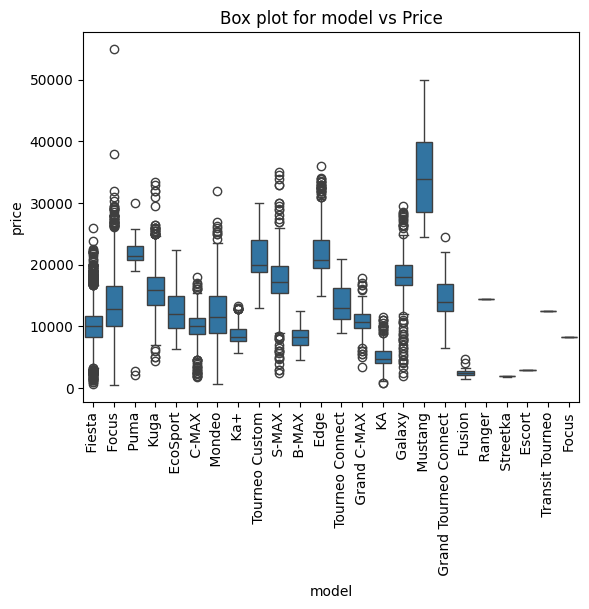

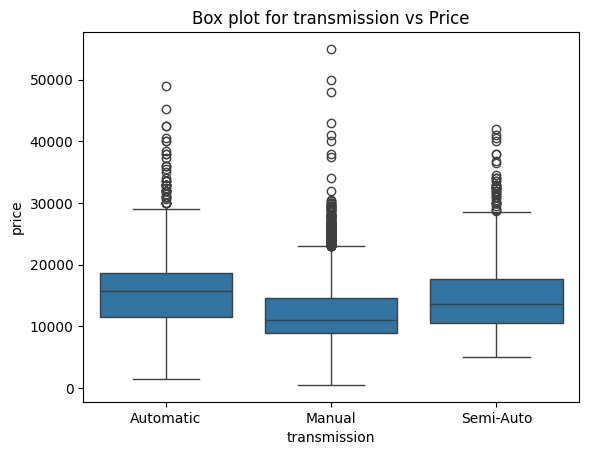

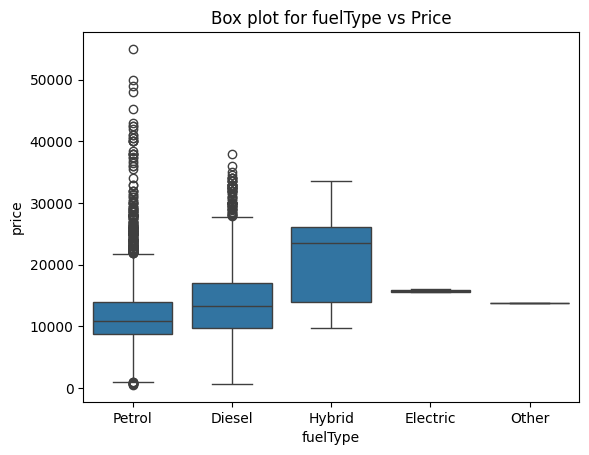

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

object_attributes = df.select_dtypes(include='object').columns.tolist()

for attribute in object_attributes:
    sns.boxplot(x=attribute, y='price', data=df)
    plt.title(f'Box plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('price')
    if attribute == 'model':
        plt.xticks(rotation=90)
    plt.show()

### Regression plots for numerical attributes

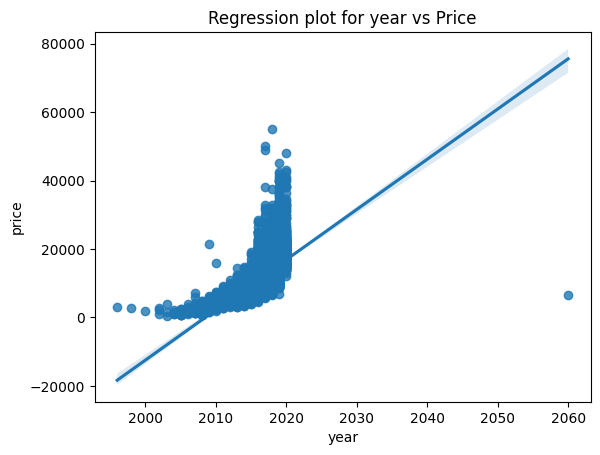

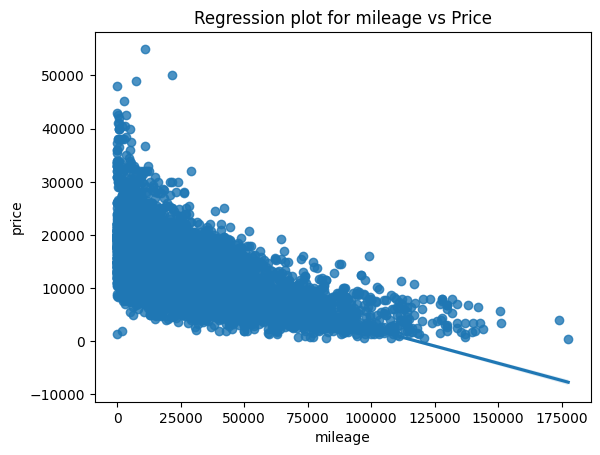

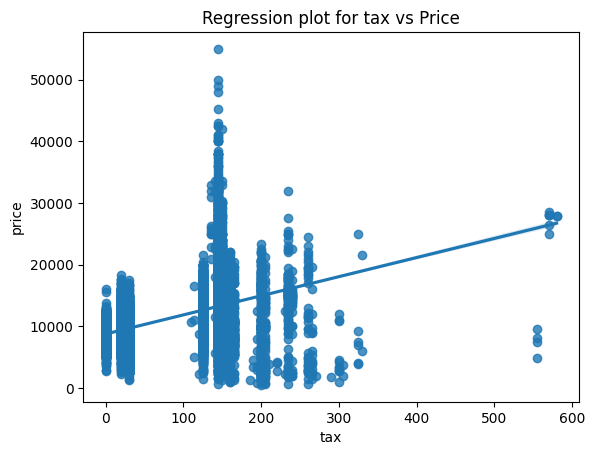

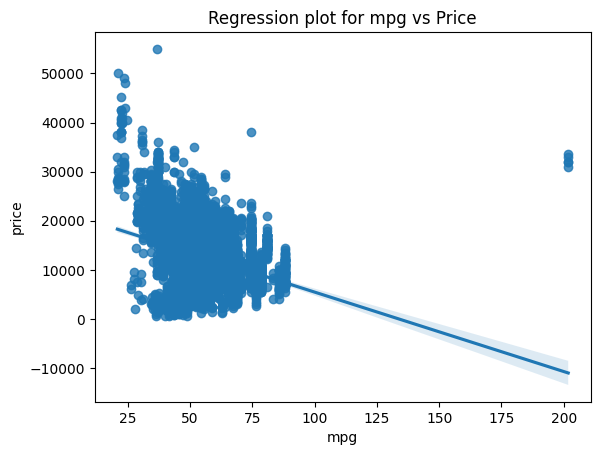

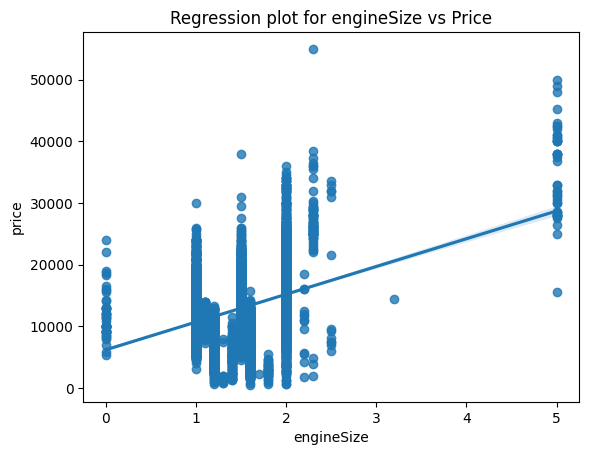

In [59]:
numerical_attributes = df.select_dtypes(include=np.number).columns.tolist()
numerical_attributes.remove('price')

for attribute in numerical_attributes:
    sns.regplot(x=attribute, y='price', data=df)
    plt.title(f'Regression plot for {attribute} vs Price')
    plt.xlabel(attribute)
    plt.ylabel('price')
    plt.show()


## Model developement and Evaluations

#### Linear Regression 

In [58]:
###Linear regression model using the mpg attribute
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

###Extract the source variable and the target variable from the data frame
X = df[['mpg']]
y = df[['price']]

###Initialize a linear regression model
model = LinearRegression()

#train the model using the source and target variables
model.fit(X, y)

#make predictions using the trained model
y_pred = model.predict(X)

#calculate the mean square error (MSE)
mse = mean_squared_error(y, y_pred)

#calculate the coefficient of determination (R^2)
r2 = r2_score(y, y_pred)

#display the MSE  ane R^2 values
print("Mean Square Error (MSE): ", mse)
print("Coefficient of determination (R^2): ", r2)

Mean Square Error (MSE):  19741690.80944619
Coefficient of determination (R^2):  0.11989802249624182


#### Multilineal regression

In [60]:
# Extract the source variables and target variable from the data frame
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Initialize a linear regression model
model = LinearRegression()

# Train the model using the source and target variables
model.fit(X, y)

# Make predictions using the trained model
y_pred = model.predict(X)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)


Mean Squared Error (MSE): 6134065.224381753
Coefficient of Determination (R^2): 0.7265379654546995


#### Building a Pipeline

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


# Extract the source variables and target variable from the data frame
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Create a pipeline that performs parameter scaling, polynomial feature generation, and linear regression
# Define the pipeline 
pipeline = Pipeline([ ('scaler', StandardScaler()), ('poly_features', PolynomialFeatures(degree=2)), ('regressor', LinearRegression()) ]) 

# Train the model using the source and target variables
pipeline.fit(X, y)

# Make predictions using the trained model
y_pred = pipeline.predict(X)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y, y_pred)
# Calculate the coefficient of determination (R^2)
r2 = r2_score(y, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)
#feature_names = pipeline.named_steps['poly_features'].get_feature_names_out()
#print(feature_names)


Mean Squared Error (MSE): 5234038.06546274
Coefficient of Determination (R^2): 0.7666619695239302


#### Ridge regression (linear)

In [73]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge 

X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Create and fit a Ridge regression model 
ridge_model = Ridge(alpha=0.1) 
ridge_model.fit(X_train, y_train) 

# Make predictions on the testing data 
y_pred = ridge_model.predict(X_test) 

# Calculate the MSE and R^2 values 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)


Mean Squared Error (MSE): 6912725.801054858
Coefficient of Determination (R^2): 0.6917134446113168


#### Polynomial Ridge regression

In [81]:
# Split the data into training and testing sets 

X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


# Apply second degree polynomial scaling to the training and testing 
polynomial_scaler = PolynomialFeatures(degree=2) 
polynomial_scaled_train_data = polynomial_scaler.fit_transform(X_train, y_train) 
polynomial_scaled_test_data = polynomial_scaler.fit_transform(X_test, y_test) 

# Create and fit a Ridge regression model using the training data 
ridge_model = Ridge(alpha=0.1) 
ridge_model.fit(polynomial_scaled_train_data, y_train) 

# Make predictions on the testing data 
y_pred = ridge_model.predict(polynomial_scaled_test_data) 

# Calculate the MSE and R^2 values 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 7326174.870379201
Coefficient of Determination (R^2): 0.6732748730436136


/home/adrian/Documents/data-science/jupyter-notebooks/my-venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


#### GridSearch and Ridge regression

In [86]:
from sklearn.model_selection import GridSearchCV, cross_val_score

X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Create polynomial features and scaling the train and test data to a polynomial of degree 2
polynomial_scaler = PolynomialFeatures(degree=2) 
polynomial_scaled_train_data = polynomial_scaler.fit_transform(X_train, y_train) 
polynomial_scaled_test_data = polynomial_scaler.fit_transform(X_test, y_test) 

# Define the hyperparameter values for the grid search
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

# Initialize a ridge regression model
model = Ridge()

# Perform grid search with cross-validation (4-fold in this case)
grid_search = GridSearchCV(model, param_grid, cv=4)

# Train the model using the polynomial features and target variable
grid_search.fit(polynomial_scaled_train_data, y_train)

# Make predictions using the trained model
y_pred = grid_search.predict(polynomial_scaled_test_data)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)

# Display the MSE and R^2 values
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

print("tuned hpyerparameters (best parameters): ", grid_search.best_params_)
print("accuracy :", grid_search.best_score_)
print('best estimator: ', grid_search.best_estimator_)

##accuracy of the test and train data

print('accuracy_test_data: ', grid_search.score(polynomial_scaled_test_data, y_test))
print('accuracy_train_data:', grid_search.score(polynomial_scaled_train_data, y_train))

Mean Squared Error (MSE): 13840985.640460506
Coefficient of Determination (R^2): 0.3827341183371298
tuned hpyerparameters (best parameters):  {'alpha': 0.01}
accuracy : 0.7735031607505987
best estimator:  Ridge(alpha=0.01)
accuracy_test_data:  0.3827341183371298
accuracy_train_data: 0.7764672334506988


/home/adrian/Documents/data-science/jupyter-notebooks/my-venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/adrian/Documents/data-science/jupyter-notebooks/my-venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/adrian/Documents/data-science/jupyter-notebooks/my-venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/adrian/Documents/data-science/jupyter-notebooks/my-venv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matri